In [2]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

iris = load_iris()
X, y = iris.data, iris.target

selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X, y)

selected_features = selector.get_support(indices=True)
feature_names = [iris.feature_names[i] for i in selected_features]

print("Selected features:", feature_names)


Selected features: ['petal length (cm)', 'petal width (cm)']


In [3]:
from sklearn.ensemble import RandomForestClassifier
feature_names = iris.feature_names
import pandas as pd
import numpy as np
df = pd.DataFrame(X, columns=feature_names)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X, y)

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]  
top_n = 2 

print("Feature ranking:")

for i in range(X.shape[1]):
    print(f"{i+1}. Feature: {feature_names[indices[i]]} (Importance: {importances[indices[i]]:.4f})")

selected_features = [feature_names[indices[i]] for i in range(top_n)]

print(f"\nSelected top {top_n} features:", selected_features)

X_selected = df[selected_features]
print("\nDataFrame with selected features:")
print(X_selected.head())


Feature ranking:
1. Feature: petal length (cm) (Importance: 0.4361)
2. Feature: petal width (cm) (Importance: 0.4361)
3. Feature: sepal length (cm) (Importance: 0.1061)
4. Feature: sepal width (cm) (Importance: 0.0217)

Selected top 2 features: ['petal length (cm)', 'petal width (cm)']

DataFrame with selected features:
   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add the target column to the DataFrame for visualization
pca_df['Target'] = y

# Display the first few rows of the PCA-transformed data
print("PCA-transformed data:")
print(pca_df.head())

# Optional: Explained variance ratio of the principal components
explained_variance = pca.explained_variance_ratio_
print(f"\nExplained variance by each principal component: {explained_variance}")
print(f"Total explained variance: {explained_variance.sum()}")

PCA-transformed data:
   Principal Component 1  Principal Component 2  Target
0              -2.684126               0.319397       0
1              -2.714142              -0.177001       0
2              -2.888991              -0.144949       0
3              -2.745343              -0.318299       0
4              -2.728717               0.326755       0

Explained variance by each principal component: [0.92461872 0.05306648]
Total explained variance: 0.9776852063187963


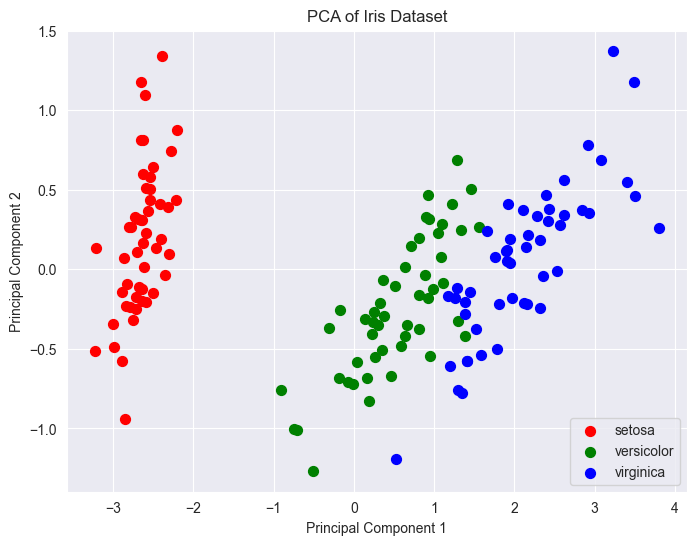

In [6]:
import matplotlib.pyplot as plt

# Plot the PCA result
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
targets = [0, 1, 2]
labels = iris.target_names

for target, color in zip(targets, colors):
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'Principal Component 1'], 
                pca_df.loc[indices, 'Principal Component 2'], 
                c=color, s=50, label=labels[target])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()
